# Punto 3:
Implementación de un sistema de segmentación automatico en un banco. Lo que se busca es la probabilidad de que un cliente sea clasificado como PREFERENCIAL.

**Variables de entrada:**


*   Cantidad de dinero ahorrado en el banco
*   Salario del cliente

**Variables de salida:**

* Probabilidad de ser un cliente preferencial








In [1]:
# INSTALAR FUZZY

!pip install scikit-fuzzy;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=8863b777c617179b075f1171a591461f9a8eaed926a868ac6991f4a02f2b678a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
# IMPORTAR LIBRERIAS

import numpy as np;
import skfuzzy as fuzz;
from skfuzzy import control as ctrl;

Para este caso, los rangos que se definio para cada variable son:


* Cantidad de dinero ahorrado (0 - 600 millones)
* Salario del cliente (0 - 18 millones)
* Probabilidad de ser cliente preferencial (0 - 100 %)



In [3]:
#DEFINIR VARIABLES

#variables de entrada
dinero_ahorrado = ctrl.Antecedent(np.arange(0,601,1),'dinero ahorrado [Millones]');
salario_cliente = ctrl.Antecedent(np.arange(0,19,1),'salario_cliente');

#varibale de salida
probabilidad_preferencial = ctrl.Consequent(np.arange(0,101,1),'probabilidad preferencial');

# Funciones de menbresia

**Cantidad de dinero ahorrado:**
* muy poco (0 - 5 millones)
* poco (2 - 15 millones)
* normal (10 - 40 millones)
* considerable (35 - 200 millones)
* gran monto (150 - 600 millones)





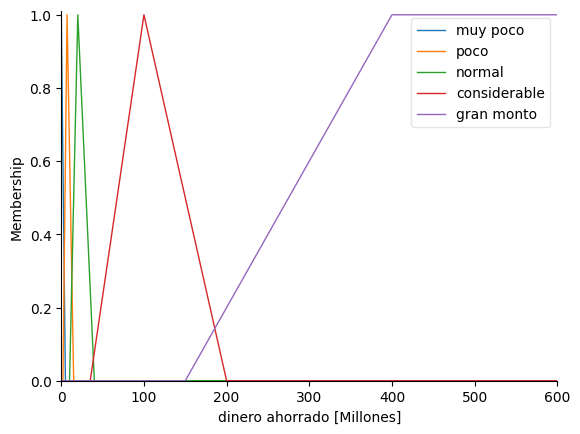

In [4]:
# FUNCIONES DE MEMBRESIA
# las variables se han normalizado para evitar tener que escibir todos los valores de millones
# por eso 1, se intepreta como UN MILLON y 300 como TRESCIENTOS MILLONES, y asi mismo con la variable de salario.

# dinero ahorrado
dinero_ahorrado['muy poco'] = fuzz.trimf(dinero_ahorrado.universe,[0,0,5]);
dinero_ahorrado['poco'] = fuzz.trimf(dinero_ahorrado.universe,[2,7,15]);
dinero_ahorrado['normal'] = fuzz.trimf(dinero_ahorrado.universe,[10,20,40]);
dinero_ahorrado['considerable'] = fuzz.trimf(dinero_ahorrado.universe,[35,100,200]);
dinero_ahorrado['gran monto'] = fuzz.trapmf(dinero_ahorrado.universe,[150,400,600,600]);

dinero_ahorrado.view();

**Salario del cliente:**
* bajo (0 - 2 millones)
* normal (1 - 3 millones)
* afortunado (2 - 5 millones)
* buen sueldo (4 - 8 millones)
* sueldaso (7 - 12 millones)
* mucho sueldo (10 - 15 millones)
* demasiado sueldo (13 - 18 millones)

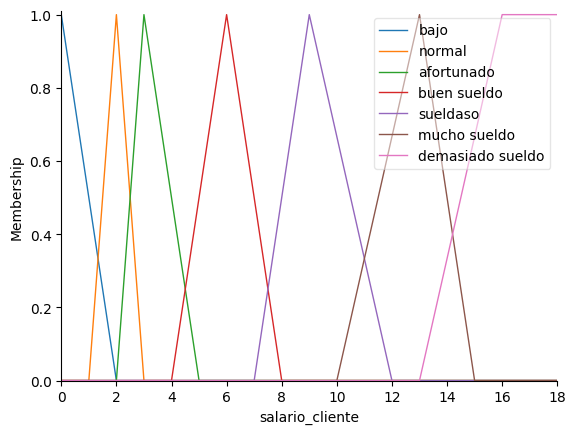

In [5]:
# salario del cliente
salario_cliente['bajo'] = fuzz.trimf(salario_cliente.universe,[0,0,2]);
salario_cliente['normal'] = fuzz.trimf(salario_cliente.universe,[1,2,3]);
salario_cliente['afortunado'] = fuzz.trimf(salario_cliente.universe,[2,3,5]);
salario_cliente['buen sueldo'] = fuzz.trimf(salario_cliente.universe,[4,6,8]);
salario_cliente['sueldaso'] = fuzz.trimf(salario_cliente.universe,[7,9,12]);
salario_cliente['mucho sueldo'] = fuzz.trimf(salario_cliente.universe,[10,13,15]);
salario_cliente['demasiado sueldo'] = fuzz.trapmf(salario_cliente.universe,[13,16,18,18]);

salario_cliente.view();

**Probabildad de ser cliente preferencial**
* Muy poco probable (0 - 12 %)  =  (0)
* poco probable (8 - 30 %)    = (1)
* indiferente (20 - 45 %)    = (2)
* en consideración (30 - 60 %) =   (3)
* probable (50 - 72 %)  = (4)
* muy probable (70 - 85 %)   = (5)
* cliente potencial (80 - 100 %) =   (6)

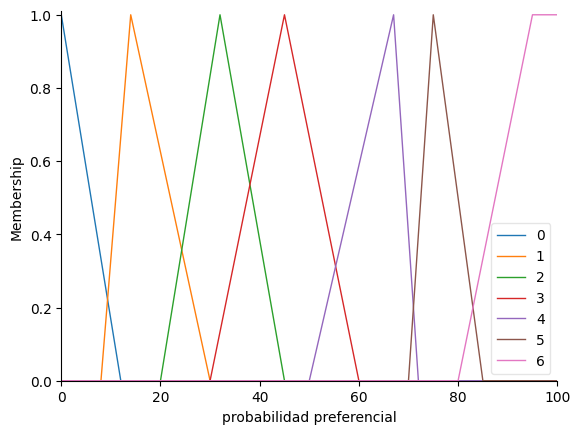

In [6]:
# probabilidad de ser cliente preferencial
probabilidad_preferencial['0'] = fuzz.trimf(probabilidad_preferencial.universe,[0,0,12]);
probabilidad_preferencial['1'] = fuzz.trimf(probabilidad_preferencial.universe,[8,14,30]);
probabilidad_preferencial['2'] = fuzz.trimf(probabilidad_preferencial.universe,[20,32,45]);
probabilidad_preferencial['3'] = fuzz.trimf(probabilidad_preferencial.universe,[30,45,60]);
probabilidad_preferencial['4'] = fuzz.trimf(probabilidad_preferencial.universe,[50,67,72]);
probabilidad_preferencial['5'] = fuzz.trimf(probabilidad_preferencial.universe,[70,75,85]);
probabilidad_preferencial['6'] = fuzz.trapmf(probabilidad_preferencial.universe,[80,95,100,100]);

probabilidad_preferencial.view();

# Reglas difusas


In [7]:
# REGLAS DIFUSAS

#muy poco
regla1 = ctrl.Rule(dinero_ahorrado['muy poco'] & salario_cliente['bajo'], probabilidad_preferencial['0']);
regla2 = ctrl.Rule(dinero_ahorrado['muy poco'] & salario_cliente['normal'], probabilidad_preferencial['0']);
regla3 = ctrl.Rule(dinero_ahorrado['muy poco'] & salario_cliente['afortunado'], probabilidad_preferencial['0']);
regla4 = ctrl.Rule(dinero_ahorrado['muy poco'] & salario_cliente['buen sueldo'], probabilidad_preferencial['1']);
regla5 = ctrl.Rule(dinero_ahorrado['muy poco'] & salario_cliente['sueldaso'], probabilidad_preferencial['2']);
regla6 = ctrl.Rule(dinero_ahorrado['muy poco'] & salario_cliente['mucho sueldo'], probabilidad_preferencial['3']);
regla7 = ctrl.Rule(dinero_ahorrado['muy poco'] & salario_cliente['demasiado sueldo'], probabilidad_preferencial['3']);

#poco
regla8 = ctrl.Rule(dinero_ahorrado['poco'] & salario_cliente['bajo'], probabilidad_preferencial['0']);
regla9 = ctrl.Rule(dinero_ahorrado['poco'] & salario_cliente['normal'], probabilidad_preferencial['0']);
regla10 = ctrl.Rule(dinero_ahorrado['poco'] & salario_cliente['afortunado'], probabilidad_preferencial['1']);
regla11 = ctrl.Rule(dinero_ahorrado['poco'] & salario_cliente['buen sueldo'], probabilidad_preferencial['1']);
regla12 = ctrl.Rule(dinero_ahorrado['poco'] & salario_cliente['sueldaso'], probabilidad_preferencial['2']);
regla13 = ctrl.Rule(dinero_ahorrado['poco'] & salario_cliente['mucho sueldo'], probabilidad_preferencial['2']);
regla14 = ctrl.Rule(dinero_ahorrado['poco'] & salario_cliente['demasiado sueldo'], probabilidad_preferencial['3']);

#normal
regla15 = ctrl.Rule(dinero_ahorrado['normal'] & salario_cliente['bajo'], probabilidad_preferencial['0']);
regla16 = ctrl.Rule(dinero_ahorrado['normal'] & salario_cliente['normal'], probabilidad_preferencial['1']);
regla17 = ctrl.Rule(dinero_ahorrado['normal'] & salario_cliente['afortunado'], probabilidad_preferencial['2']);
regla18 = ctrl.Rule(dinero_ahorrado['normal'] & salario_cliente['buen sueldo'], probabilidad_preferencial['3']);
regla19 = ctrl.Rule(dinero_ahorrado['normal'] & salario_cliente['sueldaso'], probabilidad_preferencial['4']);
regla20 = ctrl.Rule(dinero_ahorrado['normal'] & salario_cliente['mucho sueldo'], probabilidad_preferencial['4']);
regla21= ctrl.Rule(dinero_ahorrado['normal'] & salario_cliente['demasiado sueldo'], probabilidad_preferencial['5']);

#considerable
regla22 = ctrl.Rule(dinero_ahorrado['considerable'] & salario_cliente['bajo'], probabilidad_preferencial['1']);
regla23= ctrl.Rule(dinero_ahorrado['considerable'] & salario_cliente['normal'], probabilidad_preferencial['1']);
regla24= ctrl.Rule(dinero_ahorrado['considerable'] & salario_cliente['afortunado'], probabilidad_preferencial['2']);
regla25= ctrl.Rule(dinero_ahorrado['considerable'] & salario_cliente['buen sueldo'], probabilidad_preferencial['2']);
regla26= ctrl.Rule(dinero_ahorrado['considerable'] & salario_cliente['sueldaso'], probabilidad_preferencial['4']);
regla27= ctrl.Rule(dinero_ahorrado['considerable'] & salario_cliente['mucho sueldo'], probabilidad_preferencial['5']);
regla28= ctrl.Rule(dinero_ahorrado['considerable'] & salario_cliente['demasiado sueldo'], probabilidad_preferencial['6']);

#gran monto
regla29 = ctrl.Rule(dinero_ahorrado['gran monto'] & salario_cliente['bajo'], probabilidad_preferencial['3']);
regla30= ctrl.Rule(dinero_ahorrado['gran monto'] & salario_cliente['normal'], probabilidad_preferencial['3']);
regla31= ctrl.Rule(dinero_ahorrado['gran monto'] & salario_cliente['afortunado'], probabilidad_preferencial['4']);
regla32= ctrl.Rule(dinero_ahorrado['gran monto'] & salario_cliente['buen sueldo'], probabilidad_preferencial['4']);
regla33= ctrl.Rule(dinero_ahorrado['gran monto'] & salario_cliente['sueldaso'], probabilidad_preferencial['5']);
regla34= ctrl.Rule(dinero_ahorrado['gran monto'] & salario_cliente['mucho sueldo'], probabilidad_preferencial['6']);
regla35= ctrl.Rule(dinero_ahorrado['gran monto'] & salario_cliente['demasiado sueldo'], probabilidad_preferencial['6']);


In [8]:
# SISTEMA DE CONTROL

sistema_control = ctrl.ControlSystem(
    [
        regla1,
        regla2,
        regla3,
        regla4,
        regla5,
        regla6,
        regla7,
        regla8,
        regla9,
        regla10,
        regla11,
        regla12,
        regla13,
        regla14,
        regla15,
        regla16,
        regla17,
        regla18,
        regla19,
        regla20,
        regla21,
        regla22,
        regla23,
        regla24,
        regla25,
        regla26,
        regla27,
        regla28,
        regla29,
        regla30,
        regla31,
        regla32,
        regla33,
        regla34,
        regla35,

    ]
)

controlador = ctrl.ControlSystemSimulation(sistema_control);

# Pruebas
ahora se procede a probar el control, con casos hipoteticos en los cuales ya se da el valor de salida esperad, y lo que se buscaes comparar los resultados.

**casos:**

1. Adriana debe tener una probabilidad de al menos 90% de ser preferencial, tiene 500 Millones ahorrados y tiene un salario de $15 Millones al mes.

2. Nelson debe tener una probabilidad alrededor de 60% de ser preferencial, tiene 30 millones ahorrados y un salario de $9 millones al mes.

3. Federico no debe sobrepasar una probabilidad de 20% de ser preferencial, tiene 40 millones ahorrados y un salario de $1.160.000 al mes.

4. Verónica debe estar alrededor de un 5% de ser preferencial, no tiene dinero
ahorrado en el banco y su salario es de $1.500.000 .






In [9]:
# CASO 1
# para digitar los valores, se debe tener en cuenta la normalizacion que se ha hecho a las variables de dinero_ ahorrado y salario_cliente
# la P debe ser superior al 90%

controlador.input['dinero ahorrado [Millones]'] = 500; #MILLONES
controlador.input['salario_cliente'] = 15; #MILLONES

controlador.compute();

probabilidad = controlador.output['probabilidad preferencial'];
print(f'La probabilidad de ser cliente preferencial es : {round(probabilidad,2)} %');

La probabilidad de ser cliente preferencial es : 92.22 %


In [10]:
#CASO 2
# la P debe estar alrededor de 60%

controlador.input['dinero ahorrado [Millones]'] = 30; #MILLONES
controlador.input['salario_cliente'] = 9; #MILLONES

controlador.compute();

probabilidad = controlador.output['probabilidad preferencial'];
print(f'La probabilidad de ser cliente preferencial es : {round(probabilidad,2)} %');

La probabilidad de ser cliente preferencial es : 62.33 %


In [11]:
#CASO 3
# la P no debe ser superior al 20%

controlador.input['dinero ahorrado [Millones]'] = 40; #MILLONES
controlador.input['salario_cliente'] = 1.16; #MILLONES

controlador.compute();

probabilidad = controlador.output['probabilidad preferencial'];
print(f'La probabilidad de ser cliente preferencial es : {round(probabilidad,2)} %');

La probabilidad de ser cliente preferencial es : 18.81 %


In [12]:
#CASO 4
# la P debe estar alrededor del 5%

controlador.input['dinero ahorrado [Millones]'] = 0; #MILLONES
controlador.input['salario_cliente'] = 1.5; #MILLONES

controlador.compute();

probabilidad = controlador.output['probabilidad preferencial'];
print(f'La probabilidad de ser cliente preferencial es : {round(probabilidad,2)} %');

La probabilidad de ser cliente preferencial es : 4.67 %
